# Chapter 3 - Unsupervised learning and preprocessing

Unsupervised learning subsumes all kinds of machine
learning where there is no known output, no teacher to instruct the learning algorithm.
In unsupervised learning, the learning algorithm is just shown the input data
and asked to extract knowledge from this data.

In [5]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt

%matplotlib inline

## Types of Unsupervised Learning

We will look into two kinds of unsupervised learning in this chapter: 
* transformations of the dataset 
* clustering.

Unsupervised transformations of a dataset are algorithms that create a new representation
of the data which might be easier for humans or other machine learning algorithms
to understand compared to the original representation of the data. A common
application of unsupervised transformations is dimensionality reduction, which takes
a high-dimensional representation of the data, consisting of many features, and finds
a new way to represent this data that summarizes the essential characteristics with
fewer features. A common application for dimensionality reduction is reduction to
two dimensions for visualization purposes.

Another application for unsupervised transformations is finding the parts or components
that “make up” the data. An example of this is topic extraction on collections of
text documents. Here, the task is to find the unknown topics that are talked about in
each document, and to learn what topics appear in each document. This can be useful
for tracking the discussion of themes like elections, gun control, or pop stars on social
media.

Clustering algorithms, on the other hand, partition data into distinct groups of similar
items. Consider the example of uploading photos to a social media site. To allow you to organize your pictures, the site might want to group together pictures that show
the same person. However, the site doesn’t know which pictures show whom, and it
doesn’t know how many different people appear in your photo collection. A sensible
approach would be to extract all the faces and divide them into groups of faces that
look similar. Hopefully, these correspond to the same person, and the images can be
grouped together for you.

## Challenges in Unsupervised Learning

A major challenge in unsupervised learning is evaluating whether the algorithm
learned something useful. Unsupervised learning algorithms are usually applied to
data that does not contain any label information, so we don’t know what the right
output should be. Therefore, it is very hard to say whether a model “did well.” For
example, our hypothetical clustering algorithm could have grouped together all the
pictures that show faces in profile and all the full-face pictures. This would certainly
be a possible way to divide a collection of pictures of people’s faces, but it’s not the one
we were looking for. However, there is no way for us to “tell” the algorithm what we
are looking for, and often the only way to evaluate the result of an unsupervised algorithm
is to inspect it manually.

As a consequence, unsupervised algorithms are used often in an exploratory setting,
when a data scientist wants to understand the data better, rather than as part of a
larger automatic system. Another common application for unsupervised algorithms
is as a preprocessing step for supervised algorithms. Learning a new representation of
the data can sometimes improve the accuracy of supervised algorithms, or can lead to
reduced memory and time consumption.

Even though preprocessing and
scaling are often used in tandem with supervised learning algorithms, scaling methods
don’t make use of the supervised information, making them unsupervised.

## Preprocessing and Scaling

In the previous chapter we saw that some algorithms, like neural networks and SVMs,
are very sensitive to the scaling of the data. Therefore, a common practice is to adjust
the features so that the data representation is more suitable for these algorithms.
Often, this is a simple per-feature rescaling and shift of the data. The following code
(Figure 3-1) shows a simple example:

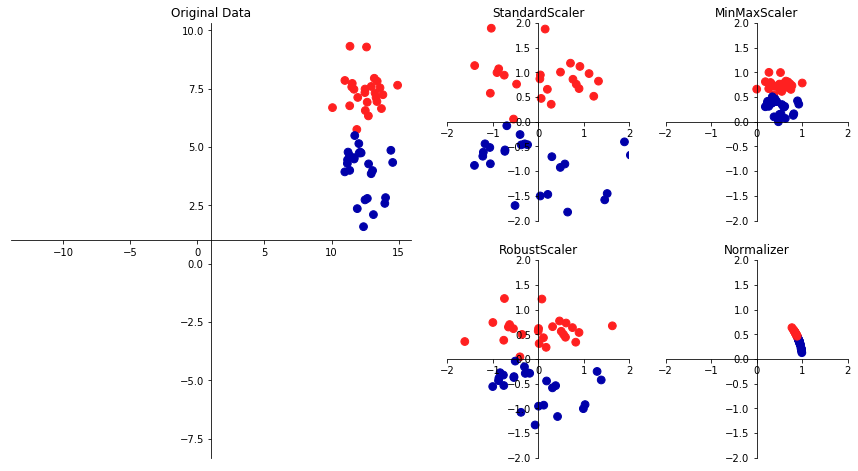

In [4]:
import mglearn
mglearn.plots.plot_scaling()

### Different kinds of preprocessing

The first plot in Figure 3-1 shows a synthetic two-class classification dataset with two
features. The first feature (the x-axis value) is between 10 and 15. The second feature
(the y-axis value) is between around 1 and 9.



The following four plots show four different ways to transform the data that yield
more standard ranges. The StandardScaler in scikit-learn ensures that for each
feature the mean is 0 and the variance is 1, bringing all features to the same magnitude.
However, this scaling does not ensure any particular minimum and maximum
values for the features. 

The RobustScaler works similarly to the StandardScaler in
that it ensures statistical properties for each feature that guarantee that they are on the
same scale. However, the RobustScaler uses the median and quartiles, instead of
mean and variance. The median of a set of numbers is the number x such that half of the numbers are smaller than x and half of
the numbers are larger than x. The lower quartile is the number x such that one-fourth of the numbers are
smaller than x, and the upper quartile is the number x such that one-fourth of the numbers are larger than x. This makes the RobustScaler ignore data points that are very
different from the rest (like measurement errors). These odd data points are also
called outliers, and can lead to trouble for other scaling techniques.

The MinMaxScaler, on the other hand, shifts the data such that all features are exactly
between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis
between 0 and 1.

Finally, the Normalizer does a very different kind of rescaling. It scales each data
point such that the feature vector has a Euclidean length of 1. In other words, it
projects a data point on the circle (or sphere, in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of its length). This normalization is often used when only the direction (or
angle) of the data matters, not the length of the feature vector.

### Applying Data Transformations

Preprocessing
methods like the scalers are usually applied before applying a supervised
machine learning algorithm. 

As an example, say we want to apply the kernel SVM
(SVC) to the cancer dataset, and use MinMaxScaler for preprocessing the data. We
start by loading our dataset and splitting it into a training set and a test set (we need
separate training and test sets to evaluate the supervised model we will build after the
preprocessing):

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"])

In [9]:
X_train.shape

(426, 30)

In [10]:
X_test.shape

(143, 30)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

We then fit the scaler using the fit method, applied to the training data. For the Min
MaxScaler, the fit method computes the minimum and maximum value of each feature
on the training set. In contrast to the classifiers and regressors of Chapter 2, the
scaler is only provided with the data (X_train) when fit is called, and y_train is not
used:

In [14]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

To apply the transformation that we just learned—that is, to actually scale the training
data—we use the transform method of the scaler. The transform method is used in
scikit-learn whenever a model returns a new representation of the data:

In [15]:
X_train_scaled = scaler.transform(X_train)

In [16]:
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  7.72900000e+00   9.71000000e+00   4.79200000e+01   1.78800000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   4.99600000e-02   1.11500000e-01   3.62100000e-01
   7.71400000e-01   7.22800000e+00   2.66700000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   7.88200000e-03   8.94800000e-04
   8.95200000e+00   1.20200000e+01   5.66500000e+01   2.40100000e+02
   8.12500000e-02   3.43200000e-02   0.00000000e+00   0.00000000e+00
   1.56500000e-01   5.50400000e-02]
per-feature maximum before scaling:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   3.89600000e+00
   2.19800000e+01   5.42200000e+02   2.33300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+0

The transformed data has the same shape as the original data—the features are simply
shifted and scaled. You can see that all of the features are now between 0 and 1, as
desired.

To apply the SVM to the scaled data, we also need to transform the test set. This is
again done by calling the transform method, this time on X_test:

In [17]:
X_test_scaled = scaler.transform(X_test)

In [18]:
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[-0.03670085  0.03415624 -0.02937829 -0.0152011   0.1185339   0.01245322
  0.          0.          0.07828283  0.07561078  0.00137606 -0.00053765
 -0.00067897 -0.0007963  -0.04616948  0.00570793  0.          0.          0.0233157
  0.00664013 -0.03772888  0.02265458 -0.03207402 -0.01367747 -0.07131235
 -0.00686738  0.          0.          0.00749064  0.02807294]
per-feature maximum after scaling:
[ 0.77429959  0.81501522  0.76241286  0.6753079   0.73007132  0.64112631
  0.74367385  0.73260437  0.70656566  0.83909014  0.38547891  1.27986078
  0.37657365  0.35977958  1.37748633  0.78219725  0.36313131  0.74389089
  0.5221478   0.75885466  0.86894566  0.93656716  0.80878951  0.79521164
  0.77573399  0.73986011  0.93450479  0.89106529  0.65010842  0.56316411]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum
and maximum are not 0 and 1. Some of the features are even outside the 0–1
range! The explanation is that the MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. This means
the transform method always subtracts the training set minimum and divides by the
training set range, which might be different from the minimum and range for the test
set.

### Scaling Training and Test Data the Same Way

It is important to apply exactly the same transformation to the training set and the
test set for the supervised model to work on the test set. The following example
(Figure 3-2) illustrates what would happen if we were to use the minimum and range
of the test set instead:

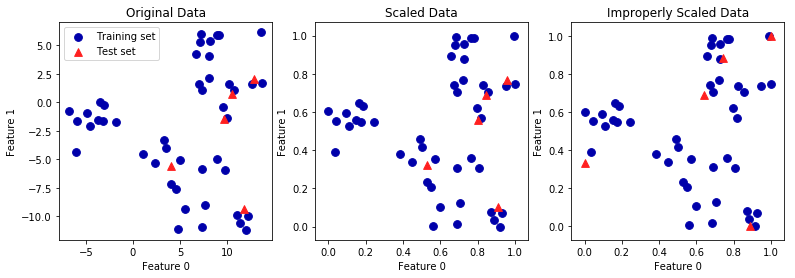

In [25]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
        c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
        c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
        c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
        c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
        c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
        marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

The first panel is an unscaled two-dimensional dataset, with the training set shown as
circles and the test set shown as triangles. The second panel is the same data, but
scaled using the MinMaxScaler. Here, we called fit on the training set, and then
called transform on the training and test sets. You can see that the dataset in the second
panel looks identical to the first; only the ticks on the axes have changed. Now all
the features are between 0 and 1. You can also see that the minimum and maximum
feature values for the test data (the triangles) are not 0 and 1.

The third panel shows what would happen if we scaled the training set and test set
separately. In this case, the minimum and maximum feature values for both the training
and the test set are 0 and 1. But now the dataset looks different. The test points
moved incongruously to the training set, as they were scaled differently. We changed
the arrangement of the data in an arbitrary way. Clearly this is not what we want to
do.

### Shortcuts and Efficient Alternatives

Often, you want to fit a model on some dataset, and then transform it. This is a very
common task, which can often be computed more efficiently than by simply calling
fit and then transform. For this use case, all models that have a transform method
also have a fit_transform method. Here is an example using StandardScaler:

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled = scaler.fit_transform(X_train)

While fit_transform is not necessarily more efficient for all models, it is still good
practice to use this method when trying to transform the training set.

### The Effect of Preprocessing on Supervised Learning

Now let’s go back to the cancer dataset and see the effect of using the MinMaxScaler
on learning the SVC (this is a different way of doing the same scaling we did in Chapter
2). First, let’s fit the SVC on the original data again for comparison:

In [32]:
# This as separate task in anki - chcę to umieć płynnie.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"])

In [33]:
from sklearn.svm import SVC
svc_clf = SVC(C=100)
svc_clf.fit(X_train, y_train)
svc_clf.score(X_test, y_test)

0.64335664335664333

Preprocessing using 0-1 scaling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Learning an SVM on the scaled training data.

In [36]:
svc_clf.fit(X_train_scaled, y_train)
svc_clf.score(X_test_scaled, y_test)

0.98601398601398604

As we saw before, the effect of scaling the data is quite significant. Even though scaling
the data doesn’t involve any complicated math, it is good practice to use the scaling
mechanisms provided by scikit-learn instead of reimplementing them yourself,
as it’s easy to make mistakes even in these simple computations.

You can also easily replace one preprocessing algorithm with another by changing the
class you use, as all of the preprocessing classes have the same interface, consisting of
the fit and transform methods:

In [37]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# learning an SVM on the scaled training data
svc_clf.fit(X_train_scaled, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
svc_clf.score(X_test_scaled, y_test)

0.97202797202797198

## Dimensionality Reduction, Feature Extraction, and Manifold Learning

As we discussed earlier, transforming data using unsupervised learning can have
many motivations. The most common motivations are visualization, compressing the
data, and finding a representation that is more informative for further processing.

One of the simplest and most widely used algorithms for all of these is principal component
analysis. We’ll also look at two other algorithms: non-negative matrix factorization
(NMF), which is commonly used for feature extraction, and t-SNE, which is
commonly used for visualization using two-dimensional scatter plots.

## 1. Principal Component Analysis (PCA)

Principal component analysis is a method that rotates the dataset in a way such that
the rotated features are statistically uncorrelated.

This rotation is often followed by
selecting only a subset of the new features, according to how important they are for
explaining the data.
**If I take full Ureduce (k=n) does the final z values equal x or they are different (uncorrelated)??**

The following example (Figure 3-3) illustrates the effect of PCA
on a synthetic two-dimensional dataset:

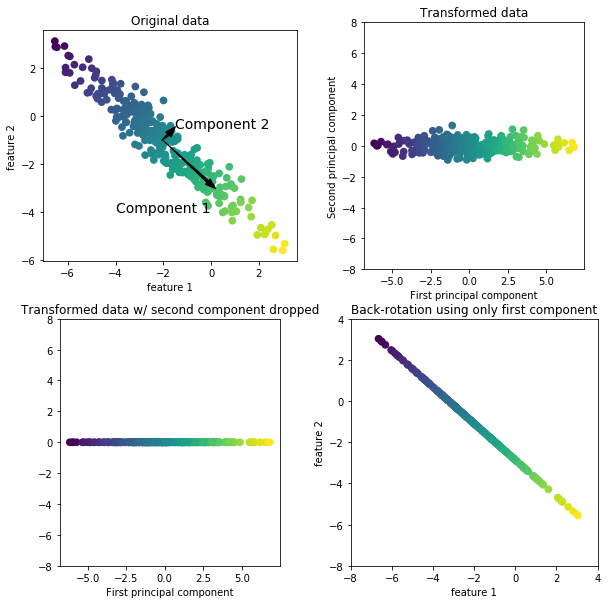

In [5]:
mglearn.plots.plot_pca_illustration()

The first plot (top left) shows the original data points, colored to distinguish among
them. The algorithm proceeds by first finding the direction of maximum variance,
labeled “Component 1.” This is the direction (or vector) in the data that contains most
of the information, or in other words, the direction along which the features are most
correlated with each other. Then, the algorithm finds the direction that contains the
most information while being orthogonal (at a right angle) to the first direction. In
two dimensions, there is only one possible orientation that is at a right angle, but in
higher-dimensional spaces there would be (infinitely) many orthogonal directions.
Although the two components are drawn as arrows, it doesn’t really matter where the
head and the tail are; we could have drawn the first component from the center up to the top left instead of down to the bottom right. The directions found using this process
are called principal components, as they are the main directions of variance in the
data. In general, there are as many principal components as original features.

The second plot (top right) shows the same data, but now rotated so that the first
principal component aligns with the x-axis and the second principal component
aligns with the y-axis. Before the rotation, the mean was subtracted from the data, so
that the transformed data is centered around zero. In the rotated representation
found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of
the data in this representation is zero except for the diagonal.

We can use PCA for dimensionality reduction by retaining only some of the principal
components. In this example, we might keep only the first principal component, as shown in the third panel in Figure 3-3 (bottom left). This reduces the data from a
two-dimensional dataset to a one-dimensional dataset. Note, however, that instead of
keeping only one of the original features, we found the most interesting direction
(top left to bottom right in the first panel) and kept this direction, the first principal
component.


Finally, we can undo the rotation and add the mean back to the data. This will result
in the data shown in the last panel in Figure 3-3. These points are in the original feature
space, but we kept only the information contained in the first principal component.
This transformation is sometimes used to remove noise effects from the data or
visualize what part of the information is retained using the principal components.

### Applying PCA to the cancer dataset for visualization

One of the most common applications of PCA is visualizing high-dimensional datasets.
As we saw in Chapter 1, it is hard to create scatter plots of data that has more
than two features. For the Iris dataset, we were able to create a pair plot (Figure 1-3 in
Chapter 1) that gave us a partial picture of the data by showing us all the possible
combinations of two features. But if we want to look at the Breast Cancer dataset,
even using a pair plot is tricky. This dataset has 30 features, which would result in
30 * 14 = 420 scatter plots! We’d never be able to look at all these plots in detail, let
alone try to understand them.

There is an even simpler visualization we can use, though—computing histograms of
each of the features for the two classes, benign and malignant cancer (Figure 3-4):

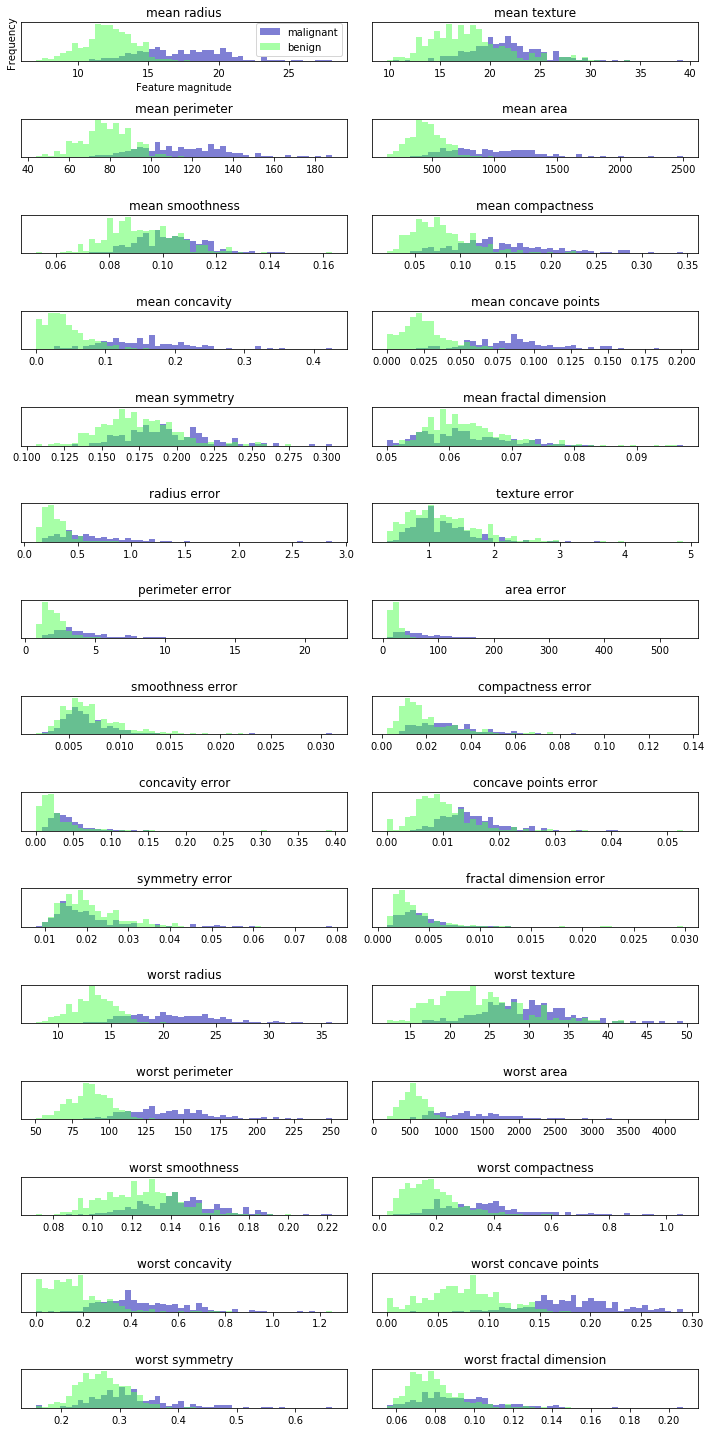

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

malignant = cancer["data"][cancer["target"] == 0]
benign = cancer["data"][cancer["target"] == 1]

fig, axes = plt.subplots(15, 2, figsize=(10, 20))

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer["data"][:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer["feature_names"][i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Here we create a histogram for each of the features, counting how often a data point
appears with a feature in a certain range (called a bin). Each plot overlays two histograms,
one for all of the points in the benign class (blue) and one for all the points in
the malignant class (red). This gives us some idea of how each feature is distributed
across the two classes, and allows us to venture a guess as to which features are better
at distinguishing malignant and benign samples. For example, the feature “smoothness
error” seems quite uninformative, because the two histograms mostly overlap,
while the feature “worst concave points” seems quite informative, because the histograms
are quite disjoint.

However, this plot doesn’t show us anything about the interactions between variables
and how these relate to the classes. Using PCA, we can capture the main interactions
and get a slightly more complete picture. We can find the first two principal components,
and visualize the data in this new two-dimensional space with a single scatter
plot.

Before we apply PCA, we scale our data so that each feature has unit variance using
StandardScaler:

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X = cancer["data"]
y = cancer["target"]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Learning the PCA transformation and applying it is as simple as applying a preprocessing
transformation. We instantiate the PCA object, find the principal components
by calling the fit method, and then apply the rotation and dimensionality reduction
by calling transform. By default, PCA only rotates (and shifts) the data, but keeps all
principal components. To reduce the dimensionality of the data, we need to specify
how many components we want to keep when creating the PCA object:

In [25]:
from sklearn.decomposition import PCA
# keep the first two pricipal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)

In [26]:
X_scaled.shape

(569, 30)

In [27]:
X_pca.shape

(569, 2)

We can now plot the first two principal components.

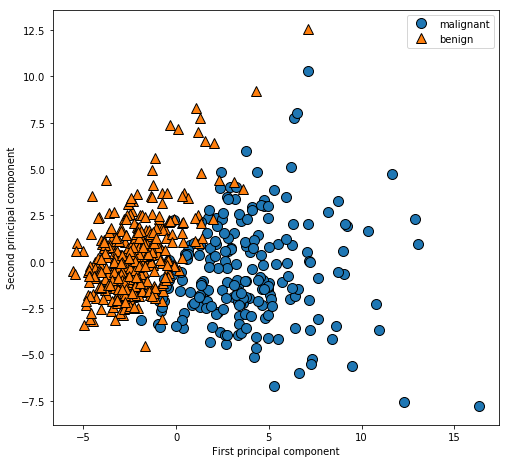

In [28]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

It is important to note that PCA is an unsupervised method, and does not use any class
information when finding the rotation. It simply looks at the correlations in the data.
For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points.
You can see that the two classes separate quite well in this two-dimensional space.
This leads us to believe that even a linear classifier (that would learn a line in this
space) could do a reasonably good job at distinguishing the two classes. We can also
see that the malignant (red) points are more spread out than the benign (blue) points
—something that we could already see a bit from the histograms in Figure 3-4.

A downside of PCA is that the two axes in the plot are often not very easy to interpret.
The principal components correspond to directions in the original data, so they are
combinations of the original features. However, these combinations are usually very
complex, as we’ll see shortly.

The principal components themselves are stored in the
components_ attribute of the PCA object during fitting:

In [29]:
pca.components_.shape

(2, 30)

Each row in components\_ corresponds to one principal component, and they are sorted
by their importance (the first principal component comes first, etc.). The columns
correspond to the original features attribute of the PCA in this example, “mean
radius,” “mean texture,” and so on. Let’s have a look at the content of components_:

In [31]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

We can also visualize the coefficients using a heat map (Figure 3-6), which might be
easier to understand:

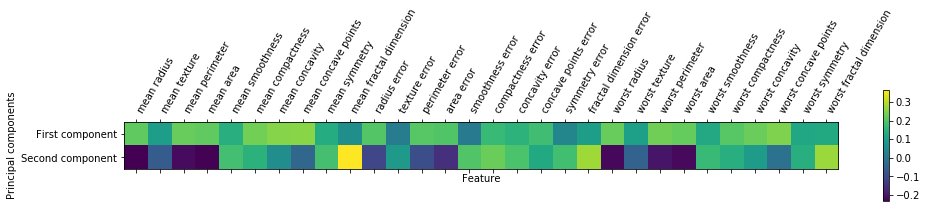

In [32]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

You can see that in the first component, all features have the same sign (it’s negative,
but as we mentioned earlier, it doesn’t matter which direction the arrow points in).
That means that there is a general correlation between all features. As one measurement
is high, the others are likely to be high as well. The second component has
mixed signs, and both of the components involve all of the 30 features. This mixing of
all features is what makes explaining the axes in Figure 3-6 so tricky.

### Eigenfaces for feature extraction

Another application of PCA that we mentioned earlier is feature extraction. The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given. A great
example of an application where feature extraction is helpful is with images. Images
are made up of pixels, usually stored as red, green, and blue (RGB) intensities.
Objects in images are usually made up of thousands of pixels, and only together are
they meaningful.

We will give a very simple application of feature extraction on images using PCA, by
working with face images from the Labeled Faces in the Wild dataset. This dataset
contains face images of celebrities downloaded from the Internet, and it includes
faces of politicians, singers, actors, and athletes from the early 2000s. We use grayscale
versions of these images, and scale

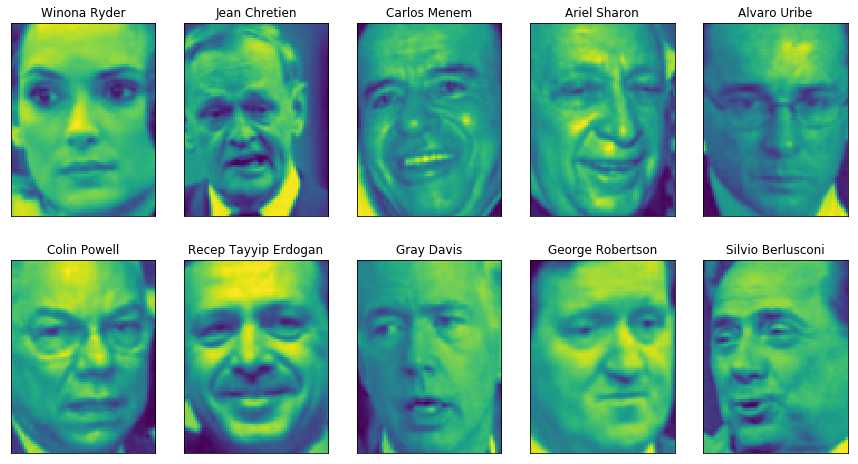

In [33]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={"xticks": (), "yticks": ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

There are 3,023 images, each 87×65 pixels large, belonging to 62 different people:

In [38]:
people.images.shape

(3023, 87, 65)

In [39]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien', 'Jennifer Aniston',
       'Jennifer Capriati', 'Jennifer Lopez', 'Jeremy Greenstock',
       'Jiang Zemin', 'John Ashcroft', 'John Negroponte',
       'Jose Maria Aznar', 'Juan Carlos Ferrero', 'Junichiro Koizumi',
       'Kofi Annan', 'Laura Bush', 'Lindsay Davenport', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Mahmoud Abbas',
       'Megawati Sukarnoputri', 'Michael Bloomberg', 'Naomi Watts',
       'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

The dataset is a bit skewed, however, containing a lot of images of George W. Bush
and Colin Powell, as you can see here:

In [40]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

To make the data less skewed, we will only take up to 50 images of each person
(otherwise, the feature extraction would be overwhelmed by the likelihood of George
W. Bush):

In [41]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

A common task in face recognition is to ask if a previously unseen face belongs to a
known person from a database. This has applications in photo collection, social
media, and security applications. One way to solve this problem would be to build a
classifier where each person is a separate class. However, there are usually many different
people in face databases, and very few images of the same person (i.e., very few
training examples per class). That makes it hard to train most classifiers. Additionally, you often want to be able to add new people easily, without needing to retrain a large
model.

A simple solution is to use a one-nearest-neighbor classifier that looks for the most
similar face image to the face you are classifying. This classifier could in principle
work with only a single training example per class. Let’s take a look at how well
KNeighborsClassifier does here:

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.2558139534883721

We obtain an accuracy of 26.6%, which is not actually that bad for a 62-class classification
problem (random guessing would give you around 1/62 = 1.5% accuracy), but
is also not great. We only correctly identify a person every fourth time.

This is where PCA comes in. Computing distances in the original pixel space is quite
a bad way to measure similarity between faces. When using a pixel representation to
compare two images, we compare the grayscale value of each individual pixel to the
value of the pixel in the corresponding position in the other image. This representation
is quite different from how humans would interpret the image of a face, and it is
hard to capture the facial features using this raw representation. For example, using
pixel distances means that shifting a face by one pixel to the right corresponds to a
drastic change, with a completely different representation. We hope that using distances
along principal components can improve our accuracy. Here, we enable the
whitening option of PCA, which rescales the principal components to have the same
scale. This is the same as using StandardScaler after the transformation. Reusing the
data from Figure 3-3 again, whitening corresponds to not only rotating the data, but
also rescaling it so that the center panel is a circle instead of an ellipse (see
Figure 3-8):

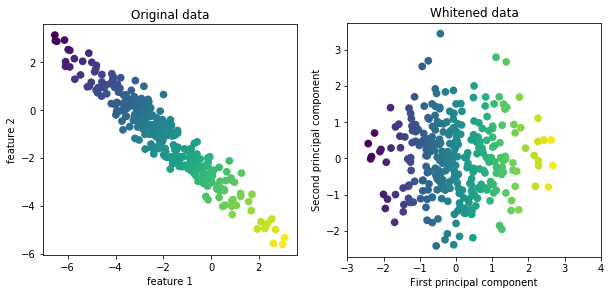

In [44]:
mglearn.plots.plot_pca_whitening()

We fit the PCA object to the training data and extract the first 100 principal components.
Then we transform the training and test data:

In [45]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [47]:
X_train_pca.shape

(1547, 100)

The new data has 100 features, the first 100 principal components. Now, we can use
the new representation to classify our images using a one-nearest-neighbors classifier:

In [52]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_pca, y_train)
knn_clf.score(X_test_pca, y_test)

0.33333333333333331

Our accuracy improved quite significantly, from 26.6% to 35.7%, confirming our
intuition that the principal components might provide a better representation of the
data.

For image data, we can also easily visualize the principal components that are found.
Remember that components correspond to directions in the input space. The input
space here is 50×37-pixel grayscale images, so directions within this space are also
50×37-pixel grayscale images.

In [53]:
pca.components_.shape

(100, 5655)

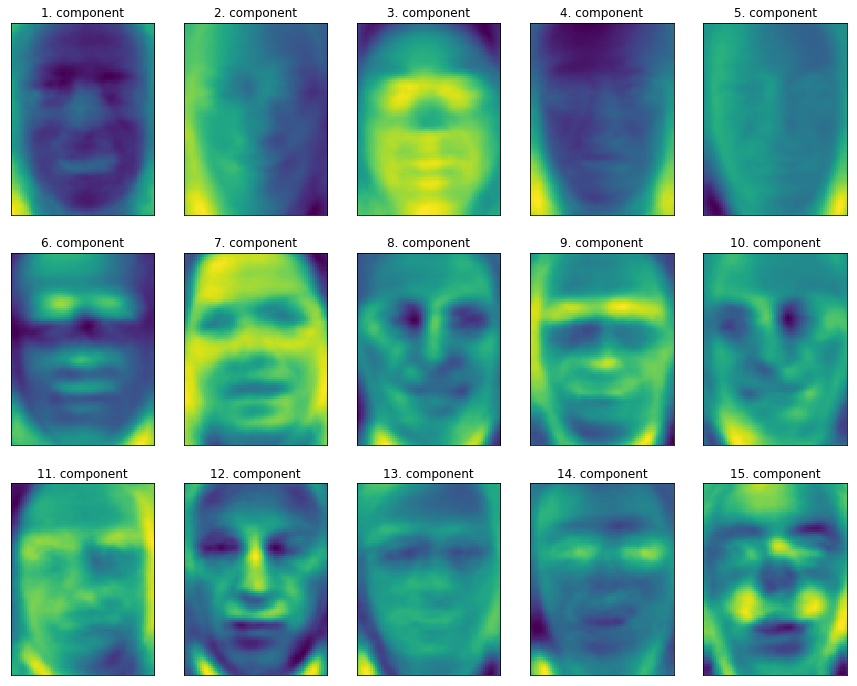

In [54]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

While we certainly cannot understand all aspects of these components, we can guess
which aspects of the face images some of the components are capturing. The first
component seems to mostly encode the contrast between the face and the background,
the second component encodes differences in lighting between the right and
the left half of the face, and so on. While this representation is slightly more semantic
than the raw pixel values, it is still quite far from how a human might perceive a face.
As the PCA model is based on pixels, the alignment of the face (the position of eyes,
chin, and nose) and the lighting both have a strong influence on how similar two
images are in their pixel representation. But alignment and lighting are probably not
what a human would perceive first. When asking people to rate similarity of faces,
they are more likely to use attributes like age, gender, facial expression, and hair style,
which are attributes that are hard to infer from the pixel intensities. It’s important to
keep in mind that algorithms often interpret data (particularly visual data, such as
images, which humans are very familiar with) quite differently from how a human
would.

Let’s come back to the specific case of PCA, though. We introduced the PCA transformation
as rotating the data and then dropping the components with low variance.
Another useful interpretation is to try to find some numbers (the new feature values
after the PCA rotation) so that we can express the test points as a weighted sum of the
principal components (see Figure 3-10).

![IRIS](resources/ch_3_1.png)

Here, x0, x1, and so on are the coefficients of the principal components for this data
point; in other words, they are the representation of the image in the rotated space.

Another way we can try to understand what a PCA model is doing is by looking at
the reconstructions of the original data using only some components. In Figure 3-3,
after dropping the second component and arriving at the third panel, we undid the
rotation and added the mean back to obtain new points in the original space with the
second component removed, as shown in the last panel. We can do a similar transformation
for the faces by reducing the data to only some principal components and
then rotating back into the original space. This return to the original feature space
can be done using the inverse_transform method. Here, we visualize the reconstruction
of some faces using 10, 50, 100, 500, or 2,000 components (Figure 3-11):

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[ 0.635294, ...,  0.777778],
       ..., 
       [ 0.057516, ...,  0.963399]], dtype=float32), 
array([[ 0.512418, ...,  0.969935],
       ..., 
       [ 0.037908, ...,  0.070588]], dtype=float32))
________________________________________________________pca_faces - 4.5s, 0.1min


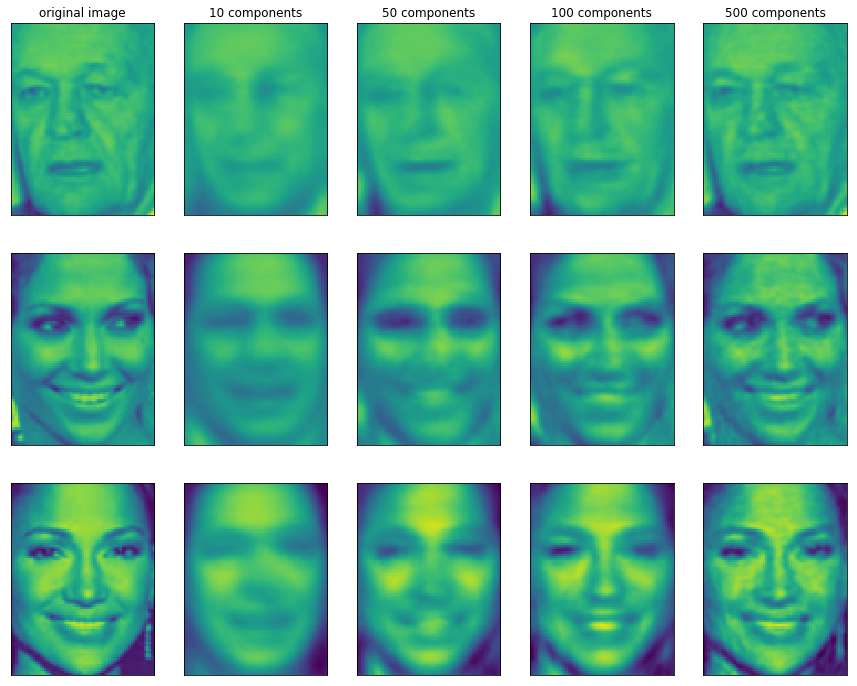

In [55]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

You can see that when we use only the first 10 principal components, only the essence
of the picture, like the face orientation and lighting, is captured. By using more and
more principal components, more and more details in the image are preserved. This corresponds to extending the sum in Figure 3-10 to include more and more terms.
Using as many components as there are pixels would mean that we would not discard
any information after the rotation, and we would reconstruct the image perfectly.

We can also try to use PCA to visualize all the faces in the dataset in a scatter plot
using the first two principal components (Figure 3-12), with classes given by who is
shown in the image, similarly to what we did for the cancer dataset:

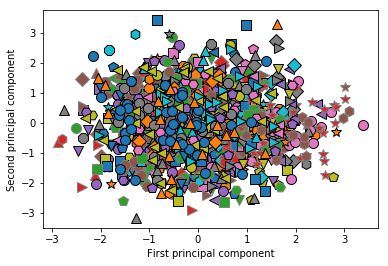

In [56]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

As you can see, when we use only the first two principal components the whole data
is just a big blob, with no separation of classes visible. This is not very surprising,
given that even with 10 components, as shown earlier in Figure 3-11, PCA only captures
very rough characteristics of the faces.

## Clustering

As we described earlier, clustering is the task of partitioning the dataset into groups,
called clusters. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. Similarly to classification
algorithms, clustering algorithms assign (or predict) a number to each data
point, indicating which cluster a particular point belongs to.

## 1. k-Means Clustering

k-means clustering is one of the simplest and most commonly used clustering algorithms.
It tries to find cluster centers that are representative of certain regions of the
data. The algorithm alternates between two steps: assigning each data point to the
closest cluster center, and then setting each cluster center as the mean of the data
points that are assigned to it. The algorithm is finished when the assignment of
instances to clusters no longer changes. The following example (Figure 3-23) illustrates
the algorithm on a synthetic dataset:

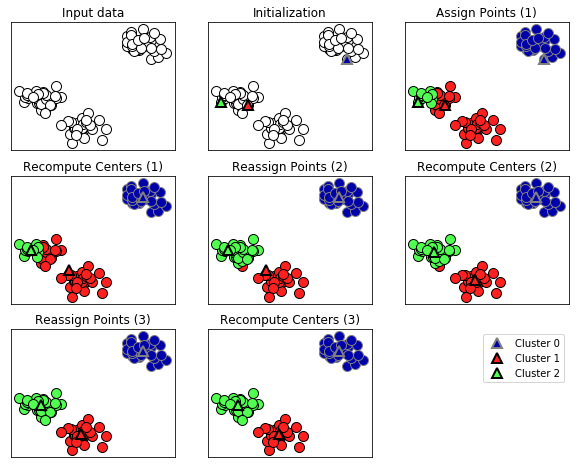

In [6]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

Cluster centers are shown as triangles, while data points are shown as circles. Colors
indicate cluster membership. We specified that we are looking for three clusters, so
the algorithm was initialized by declaring three data points randomly as cluster centers
(see “Initialization”). Then the iterative algorithm starts. First, each data point is
assigned to the cluster center it is closest to (see “Assign Points (1)”). Next, the cluster
centers are updated to be the mean of the assigned points (see “Recompute Centers
(1)”). Then the process is repeated two more times. After the third iteration, the
assignment of points to cluster centers remained unchanged, so the algorithm stops.

Given new data points, k-means will assign each to the closest cluster center. The next
example (Figure 3-24) shows the boundaries of the cluster centers that were learned
in Figure 3-23:

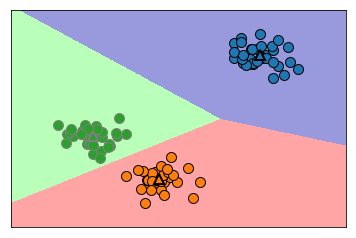

In [7]:
mglearn.plots.plot_kmeans_boundaries()

Applying k-means with scikit-learn is quite straightforward. Here, we apply it to
the synthetic data that we used for the preceding plots. We instantiate the KMeans
class, and set the number of clusters we are looking for. If you don’t provide n_clusters, it is set to 8 by default. There is no particular reason why you should use this
value. Then we call the fit method
with the data:

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

During the algorithm, each training data point in X is assigned a cluster label. You can
find these labels in the kmeans.labels_ attribute:

In [9]:
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 0,
       1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1,
       2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

As we asked for three clusters, the clusters are numbered 0 to 2.
You can also assign cluster labels to new points, using the predict method. Each new
point is assigned to the closest cluster center when predicting, but the existing model
is not changed. Running predict on the training set returns the same result as
labels_:

In [10]:
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 0,
       1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0,
       1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1,
       2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

You can see that clustering is somewhat similar to classification, in that each item gets
a label. However, there is no ground truth, and consequently the labels themselves
have no a priori meaning. Let’s go back to the example of clustering face images that
we discussed before. It might be that the cluster 3 found by the algorithm contains
only faces of your friend Bela. You can only know that after you look at the pictures,
though, and the number 3 is arbitrary. The only information the algorithm gives you
is that all faces labeled as 3 are similar.

For the clustering we just computed on the two-dimensional toy dataset, that means
that we should not assign any significance to the fact that one group was labeled 0
and another one was labeled 1. Running the algorithm again might result in a different
numbering of clusters because of the random nature of the initialization.

Here is a plot of this data again (Figure 3-25). The cluster centers are stored in the
cluster_centers_ attribute, and we plot them as triangles:

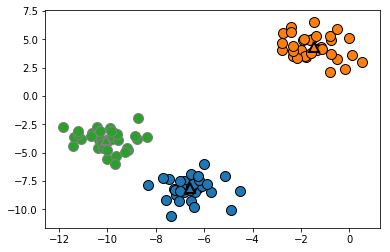

In [11]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

We can also use more or fewer cluster centers.

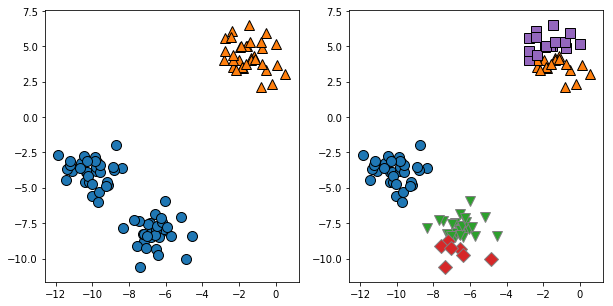

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])


### Failure cases of k-means

Even if you know the “right” number of clusters for a given dataset, k-means might
not always be able to recover them. Each cluster is defined solely by its center, which
means that each cluster is a convex shape. As a result of this, k-means can only capture
relatively simple shapes. k-means also assumes that all clusters have the same
“diameter” in some sense; it always draws the boundary between clusters to be exactly
in the middle between the cluster centers. That can sometimes lead to surprising
results, as shown in Figure 3-27:

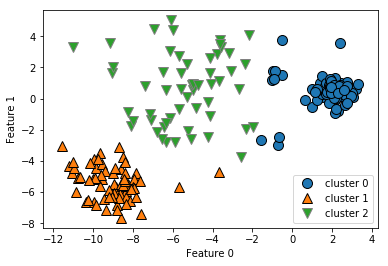

In [14]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

One might have expected the dense region in the lower left to be the first cluster, the
dense region in the upper right to be the second, and the less dense region in the center
to be the third. Instead, both cluster 0 and cluster 1 have some points that are far
away from all the other points in these clusters that “reach” toward the center.

k-means also assumes that all directions are equally important for each cluster. The
following plot (Figure 3-28) shows a two-dimensional dataset where there are three
clearly separated parts in the data. However, these groups are stretched toward the
diagonal. As k-means only considers the distance to the nearest cluster center, it can’t
handle this kind of data:

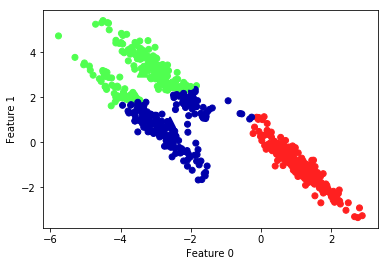

In [16]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-means also performs poorly if the clusters have more complex shapes, like the
two_moons data we encountered in Chapter 2 (see Figure 3-29):

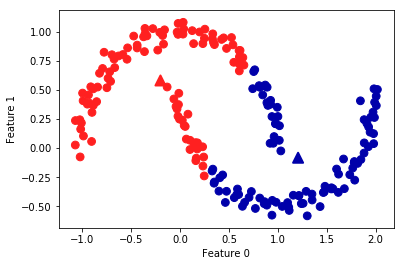

In [18]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Here, we would hope that the clustering algorithm can discover the two half-moon
shapes. However, this is not possible using the k-means algorithm.